<a href="https://colab.research.google.com/github/Cathriel/wv72_tf_201711028_20181g907_201913412_201912712_201913425/blob/main/DataSetAndNodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as npr

n = npr.randint(1000,1500)
m = npr.randint(50,100)
nFilas=1000
nColumnas=1000
array1 = npr.randint(0, nFilas, (n, 2), dtype=np.int)
array2 = npr.randint(0,nColumnas, (m, 2), dtype=np.int)
print(n,m)

1063 86


In [2]:
def DeleteEqualsAndSort(array):
  points = list()
  for i in range(len(array)):
    toAdd = (array[i][0],array[i][1])
    points.append(toAdd)
  
  for i in range(len(points)):
    j=i
    while j < len(points)-1:
      j+=1
      if points[i][1]>points[j][1]:
        points[i],points[j]=points[j],points[i]
      elif points[i][1]==points[j][1]:
        if points[i][0]>points[j][0]:
          points[i],points[j]=points[j],points[i]

  indices = list()
  for i in range(len(points)):
    j=i
    while j < (len(points)-1):
      j+=1
      if points[i][1]<points[j][1]:
        break
      if points[i][0]==points[j][0] and points[i][1]==points[j][1] and i != j:
        points.pop(j)
        j-=1

  return points

In [3]:
def DeleteEqualsArrays(entrega, almacenes):
  i=0
  while i < len(entrega):
    j=0
    while j < len(almacenes):
      if entrega[i][0] == almacenes[j][0] and entrega[i][1] == almacenes[j][1]:
        entrega.pop(i)
        i-=1
      j+=1
    i+=1
    

In [4]:
pointsAlmacenes = list()
pointsEntrega = list()
pointsEntrega=DeleteEqualsAndSort(array1)
pointsAlmacenes=DeleteEqualsAndSort(array2)
DeleteEqualsArrays(pointsEntrega,pointsAlmacenes)

In [5]:
def DeleteEqualsInExtraPoints():
  i=0
  j=0
  k=0
  nodes = list()
  almacen = False
  while i < len(extraPoints):
    addSomething = False
    toAdd=list()
    number = extraPoints[i][0]+extraPoints[i][1]*nFilas
    
    #Nodo de Abajo
    if number-nFilas>=0:
      toAdd.append(number-nFilas)

    #Nodo de la Izquierda
    if number-1>= (extraPoints[i][1]*nFilas):
      toAdd.append(number-1)

    #Nodo de la Derecha
    if number+1<((extraPoints[i][1]+1)*nFilas):
      toAdd.append(number+1)

    #Nodo de Arriba
    if number+nFilas<(nFilas*nColumnas):
      toAdd.append(number+nFilas)

    while j < len(pointsEntrega):
      if extraPoints[i][0]==pointsEntrega[j][0] and extraPoints[i][1]==pointsEntrega[j][1]:
        extraPoints.pop(i)
        i-=1
        j+=1
        toAdd.append(1)
        addSomething = True
        entrega.append(number)   
        break
      else:
        break
    while k < len(pointsAlmacenes):
      if extraPoints[i][0]==pointsAlmacenes[k][0] and extraPoints[i][1]==pointsAlmacenes[k][1]:
        extraPoints.pop(i)
        i-=1
        k+=1
        toAdd.append(2)
        addSomething = True
        almacenes.append(number)
        break
      else:
        break
    if addSomething == False:
      toAdd.append(0)
    i+=1
    nodes.append(toAdd)
  return nodes


In [6]:
extraPoints = list()
for i in range(nFilas):
  for j in range(nColumnas):
    toAdd = (j,i)
    extraPoints.append(toAdd)

In [7]:
nodos = list()
almacenes = list()
entrega = list()
nodos = DeleteEqualsInExtraPoints()

In [ ]:
np.savetxt('pointsEntrega.csv', pointsEntrega, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('pointsAlmacenes.csv', pointsAlmacenes, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('extraPoints.csv', extraPoints, fmt="%i", delimiter=",", header="x,y", comments="")

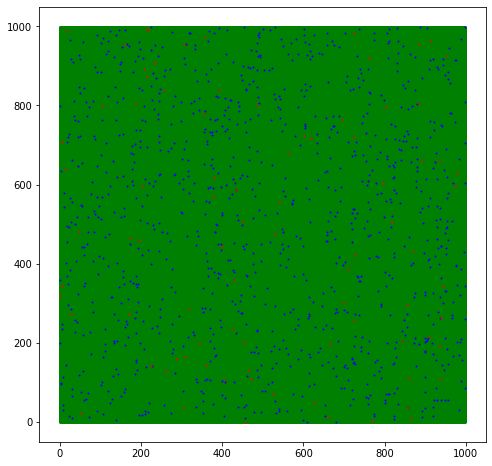

In [8]:
import matplotlib.pyplot as plt

x = list()
x2 = list()
x3 = list()
y = list()
y2 = list()
y3 = list()
fig, ax = plt.subplots(figsize=(8,8))
#plt.figure(figsize=(1,1))
for i in range(len(pointsEntrega)):
  x.append(pointsEntrega[i][0])
  y.append(pointsEntrega[i][1])
  
for i in range(len(pointsAlmacenes)):
  x2.append(pointsAlmacenes[i][0])
  y2.append(pointsAlmacenes[i][1])
  
for i in range(len(extraPoints)):
  x3.append(extraPoints[i][0])
  y3.append(extraPoints[i][1])

ax.scatter(x3,y3,color='green',s=1)
ax.scatter(x,y,color='blue',s=1)
ax.scatter(x2,y2,color='red',s=1)
plt.show()

In [9]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True
  contador = 0

  while queue:
    u = queue.pop(0)
    for v in range(len(G[u])):
      if v<(len(G[u])-1) and not visited[G[u][v]]:
        visited[G[u][v]] = True
        parent[G[u][v]] = u
        a = G[u][v] 
        if G[a][-1] == 1:
          contador +=1
        queue.append(G[u][v])
      if contador== cantidadPuntosEntrega:
        return parent

  return parent

In [11]:
cantidadPuntosEntrega=len(entrega)
for i in almacenes[:10]:
  print("Desde el nodo:",i)
  bfs(nodos,i)

Desde el nodo: 1456
Desde el nodo: 3769
Desde el nodo: 11865
Desde el nodo: 15661
Desde el nodo: 22052
Desde el nodo: 35307
Desde el nodo: 37857
Desde el nodo: 49625
Desde el nodo: 71526
Desde el nodo: 106405
